# POSTTEST 6 - Modul Unsupervised Learning
#### Nama : Jorghi Inzaghi Tanson
#### NIM    : 2009106069

##### Import library yang akan digunakan

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans

##### Di sini saya menggunakan algoritma klasterisasi yang sangat umum, yaitu KMeans Clustering

##### Deklarasi variabel untuk menampung dataset menjadi dataframe dan tampilkan isi dataframe

In [86]:
dFrame = pd.read_csv('heart_cleaned.csv')
dFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,No
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,No
...,...,...,...,...,...,...,...,...,...,...,...,...
916,57,F,ATA,130,236,0,LVH,174,N,0.000000,Flat,Yes
917,38,M,NAP,138,175,0,Normal,173,N,0.000000,Up,No
918,45,M,TA,110,223,0,Normal,132,N,1.200000,Flat,Yes
919,68,M,ASY,144,193,1,Normal,141,N,0.885157,Flat,Yes


##### Pada dataset, terlihat bahwa terdapat nilai dengan tipe data objek. Jika terdapat tipe data tersebut, maka proses klasterisasi akan terganggu, sehingga menimbulkan error. Maka dari itu, perlu dilakukan preprocessing data. Di sini saya mencoba menggunakan Encoding untuk mengganti nilai-nilai bertipe data objek menjadi tipe data angka (Tidak berlaku untuk label)

In [87]:
varEncoder = OrdinalEncoder()
dFrame['Sex'] = varEncoder.fit_transform(dFrame[['Sex']])
dFrame['ChestPainType'] = varEncoder.fit_transform(dFrame[['ChestPainType']])
dFrame['RestingECG'] = varEncoder.fit_transform(dFrame[['RestingECG']])
dFrame['ExerciseAngina'] = varEncoder.fit_transform(dFrame[['ExerciseAngina']])
dFrame['ST_Slope'] = varEncoder.fit_transform(dFrame[['ST_Slope']])

##### Tampilkan dataset hasil encoding

In [88]:
dFrame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.000000,2.0,No
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.000000,1.0,Yes
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.000000,2.0,No
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.500000,1.0,Yes
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.000000,2.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.000000,1.0,Yes
917,38,1.0,2.0,138,175,0,1.0,173,0.0,0.000000,2.0,No
918,45,1.0,3.0,110,223,0,1.0,132,0.0,1.200000,1.0,Yes
919,68,1.0,0.0,144,193,1,1.0,141,0.0,0.885157,1.0,Yes


##### Tentukan atribut yang akan dijadikan sebagai data train. Di sini saya menggunakan istilah variabel independen untuk data train

In [89]:
varIndependen = dFrame[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

#### 1) Proses klasterisasi dengan KMeans
##### Buat model dari klasterisasi yang digunakan. Karena saya menggunakan KMeans, maka gunakan fungsi KMeans() di mana nilai dari n_clusters yang saya gunakan adalah 2 (sesuaikan dengan label yang terdapat pada dataset)

In [90]:
clusterModel = KMeans(n_clusters=2)

##### Lakukan proses pencocokan atau fitting terhadap model yang telah dibuat

In [91]:
clusterModel.fit(varIndependen)

KMeans(n_clusters=2)

##### Lakukan proses labelisasi data terhadap model yang telah dibuat dengan mendeklarasi variabel yang menampung hasil labelisasi dan tampilkan isi variabel tersebut

In [92]:
labelData = clusterModel.labels_
labelData

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

#### 2) Hasil evaluasi dengan crosstab
##### Buat dataframe baru dengan parameter seperti di bawah ini yang nanti akan digunakan untuk evaluasi

In [93]:
dfBaru = pd.DataFrame({"Label": labelData, "Keluaran": dFrame["HeartDisease"]})

##### Lakukan proses evaluasi hasil labelisasi dengan crosstab menggunakan dataframe baru dan tampilkan hasil evaluasi

In [94]:
hasilEvaluasi = pd.crosstab(dfBaru['Label'], dfBaru['Keluaran'])
hasilEvaluasi

Keluaran,No,Yes
Label,,
0,388,354
1,22,157


#### 3) Visualisasi Jumlah Cluster
##### Tentukan jumlah cluster dan variabel array untuk menampung nilai kecenderungan antar klaster sebelum membuat visualisasi hasil klasterisasi. Di sini saya mencoba untuk menentukan jumlah cluster sebanyak 20 dengan fungsi range()

In [95]:
jumlahCluster = range(1, 21)
hyperParameter = []

##### Lakukan perulangan untuk menambahkan nilai-nilai kecenderungan ke dalam variabel array yang telah dibuat

In [96]:
for j in jumlahCluster:
    clusterModel = KMeans(n_clusters=j)
    clusterModel.fit(varIndependen)
    hyperParameter.append(clusterModel.inertia_)

##### Visualisasikan hasil perulangan tadi dengan diagram garis

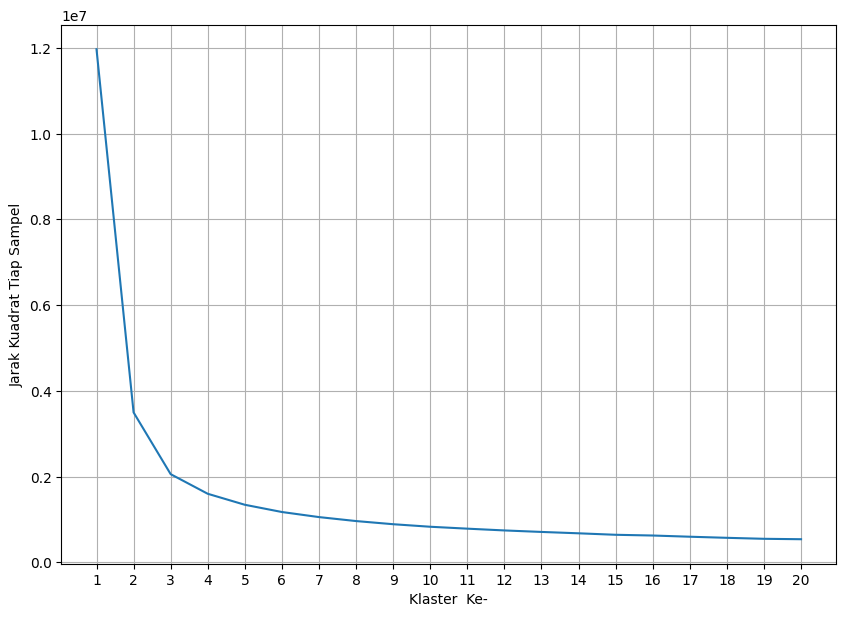

In [97]:
plt.figure(figsize=(10, 7))
plt.plot(jumlahCluster, hyperParameter)
plt.xlabel('Klaster  Ke-')
plt.ylabel('Jarak Kuadrat Tiap Sampel')
plt.xticks(jumlahCluster)
plt.grid()
plt.show()